C:\Users\tsuchida\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


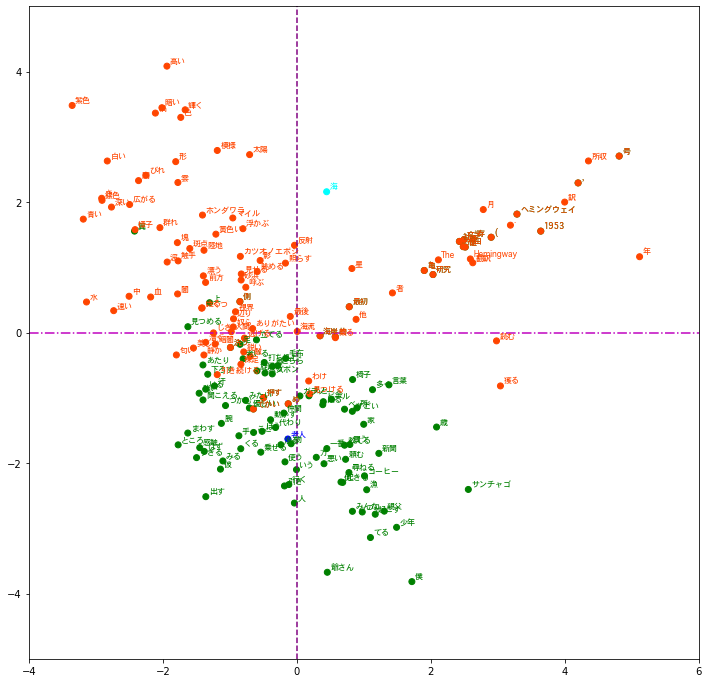

In [23]:
#AI-TECHGYM-1-12-Q-1
#自然言語処理

#実行場所
import os
os.chdir(r"C:\Users\tsuchida\Documents\techgym_セミナー\TortoiseGit_resorce\techgym_ai\Chapter_1\Answer_sheet\AI_Chapter1_saved_files")

#インポート
from gensim.models import word2vec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

#PCA
from sklearn.decomposition import PCA

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォントの指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#モデルの読み込み
model_path = './words.model'
model = word2vec.Word2Vec.load(model_path)

#単語ベクトルの可視化
def draw_2d_2groups(vectors, target1, target2, topn=100):
  similars1 = [w[0] for w in vectors.wv.most_similar(target1, topn=topn)]
  similars1.insert(0, target1)
  similars2 = [w[0] for w in vectors.wv.most_similar(target2, topn=topn)]
  similars2.insert(0, target2)
  similars = similars1 + similars2
  colors = ['b']+['g']*(topn)+ ['cyan']+['orangered']*(topn)
  X = [vectors.wv[w] for w in similars]
  pca = PCA(n_components=2)
  Y = pca.fit_transform(X)
  # plt.figure(figsize=(20,20))
  plt.scatter(Y[:,0], Y[:,1], color=colors)
  for w, x, y, c in zip(similars[:], Y[:,0], Y[:,1], colors):
    plt.annotate(w, xy=(x, y), xytext=(3,3), textcoords='offset points', fontproperties=prop, fontsize=8, color=c)
  plt.show()

#対象の単語
words = []
words.append("老人")
words.append("海")
words.append("ヘミングウェイ")
words.append("魚")
words.append("彼")

vectors =[]
for word in words:
  vectors.append(model.wv[word])

#主成分分析
pca = PCA(n_components=2)
pca.fit(vectors)
vectors_2D = pca.transform(vectors)

# for vec in vectors_2D:
#   print(vec)

# グラフの縦軸・横軸の目盛間隔を揃える
plt.figure(figsize = (12, 12))
plt.gca().set_xlim(-4, 6)
plt.gca().set_ylim(-5, 5)

# y=0に水平線を引く
plt.axhline(0, ls = "-.", color = "m")
# x=0に垂直線を引く
plt.axvline(0, ls = "--", color = "purple")

# colors = ['b']+['orangered']+['g']+['r']+['cyan']
# plt.scatter(vectors_2D[:,0], vectors_2D[:,1], color=colors)
# for w, x, y in zip(words, vectors_2D[:,0], vectors_2D[:,1]):
#   plt.annotate(w, xy=(x, y), xytext=(10,10), textcoords='offset points', fontproperties=prop, fontsize=15)
# plt.axis('equal')
# plt.show()

draw_2d_2groups(model, '老人', '海')

In [ ]:
for w, x, y, c in zip(words, vectors_2D[:,0], vectors_2D[:,1], colors):
  print(w, x, y, c)

In [ ]:
for w, c in zip(words, colors):
    print(w, c)

In [2]:
names = ['Alice', 'Bob', 'Charlie']
ages = [24, 50, 18]

for name, age in zip(names, ages):
    print(name, age)
# Alice 24
# Bob 50
# Charlie 18

Alice 24
Bob 50
Charlie 18


In [ ]:
display(set(trans[trans.StockCode=='85123A'].Description))

In [ ]:
display(set(trans[trans.StockCode=='47566'].Description))

In [ ]:
display(trans[trans.StockCode=='85123A'].Description.value_counts())

In [ ]:
display(trans.head())

In [ ]:
import numpy as np

df_view = pd.DataFrame(pd.date_range('2000-01-02', freq='1D', periods=15), columns=['Date'])

bins_dt = pd.date_range('2000-01-01', freq='3D', periods=6)
bins_str = bins_dt.astype(str).values

labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]

df['cat'] = pd.cut(df.Date.astype(np.int64)//10**9, bins=bins_dt.astype(np.int64)//10**9, labels=labels)

In [ ]:
df_view = pd.concat([trans[trans.StockCode=='85123A'], trans[trans.StockCode=='47566']], axis=0)
display(df_view.head(1))

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
df_view = df_view.set_index('InvoiceDate')
df_view.plot.bar()